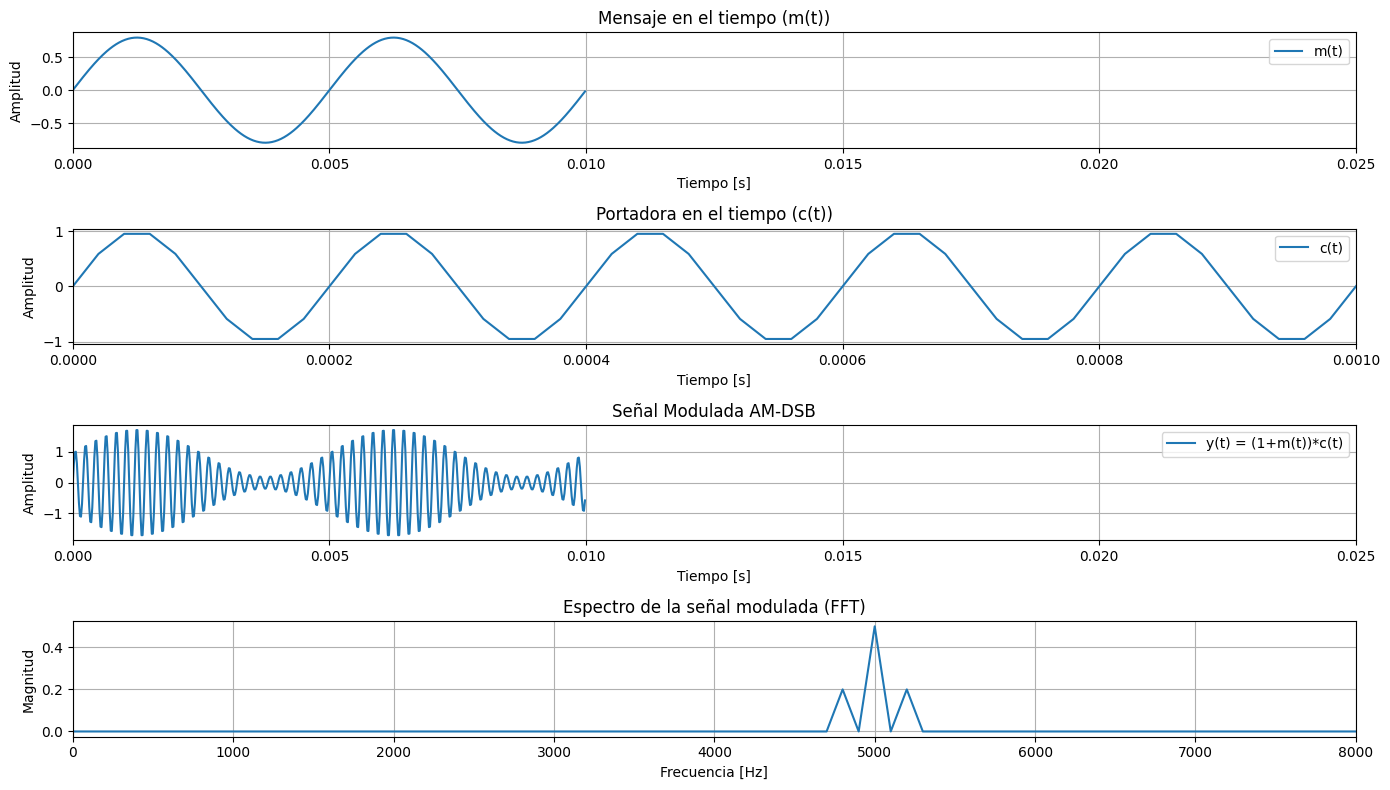

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 50000        # Frecuencia de muestreo (50 kHz para buena resolución)
T = 0.01          # Duración de la señal en segundos (10 ms)
t = np.arange(0, T, 1/fs)

# Señal mensaje (puedes variar la amplitud para probar sobremodulación)
Am = 0.8          # Amplitud del mensaje (prueba con 0.5, 1.0, 1.5, etc.)
fm = 200          # Frecuencia del mensaje (200 Hz)
m = Am * np.sin(2*np.pi*fm*t)

# Señal portadora
Ac = 1.0          # Amplitud de la portadora
fc = 5000         # Frecuencia de la portadora (5 kHz)
c = Ac * np.sin(2*np.pi*fc*t)

# Señal modulada AM-DSB
y = (1 + m) * c

# --- Gráficos ---
plt.figure(figsize=(14,8))

# Mensaje
plt.subplot(4,1,1)
plt.plot(t, m, label="m(t)")
plt.xlim(0, 5/fm)  # mostrar 5 periodos del mensaje
plt.title("Mensaje en el tiempo (m(t))")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

# Portadora (zoom)
plt.subplot(4,1,2)
plt.plot(t, c, label="c(t)")
plt.xlim(0, 5/fc)  # mostrar 5 periodos de la portadora
plt.title("Portadora en el tiempo (c(t))")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

# Señal modulada
plt.subplot(4,1,3)
plt.plot(t, y, label="y(t) = (1+m(t))*c(t)")
plt.xlim(0, 5/fm)  # unos pocos periodos del mensaje para ver la envolvente
plt.title("Señal Modulada AM-DSB")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

# Espectro (FFT hasta 8 kHz)
N = len(y)
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(N, 1/fs)
Y_mag = np.abs(Y)/N

plt.subplot(4,1,4)
plt.plot(freqs[:N//2], Y_mag[:N//2])
plt.xlim(0, 8000)
plt.title("Espectro de la señal modulada (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)

plt.tight_layout()
plt.show()

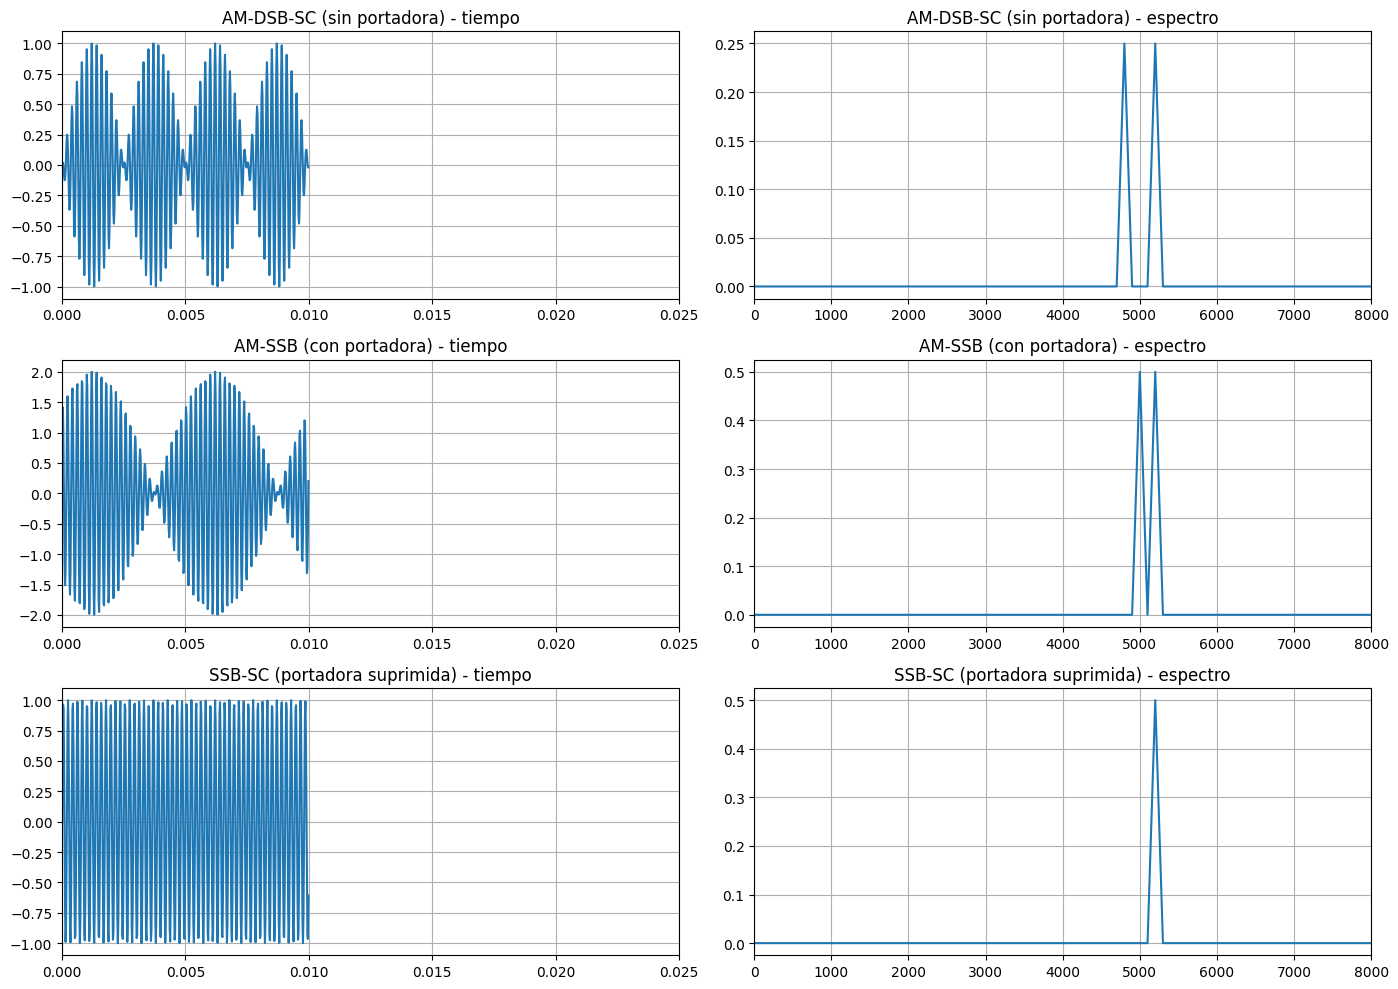

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parámetros generales
fs = 50000        # Frecuencia de muestreo
T = 0.01          # Duración
t = np.arange(0, T, 1/fs)

fm = 200          # Frecuencia del mensaje
fc = 5000         # Frecuencia de la portadora
Am = 1.0          # Amplitud del mensaje
Ac = 1.0          # Amplitud portadora

# Señal mensaje
m = Am * np.sin(2*np.pi*fm*t)

# Portadoras
c_cos = Ac * np.cos(2*np.pi*fc*t)
c_sin = Ac * np.sin(2*np.pi*fc*t)

# --- 1. AM-DSB-SC (Double Side Band sin portadora) ---
y_dsb_sc = m * c_cos

# --- 2. AM-SSB con portadora (ejemplo: banda lateral superior - USB) ---
analytic_m = hilbert(m)       # señal analítica (Hilbert)
m_hilbert = np.imag(analytic_m)
y_ssb = m * c_cos - m_hilbert * c_sin + c_cos  # USB con portadora

# --- 3. AM-SSB-SC (USB con portadora suprimida) ---
y_ssb_sc = m * c_cos - m_hilbert * c_sin

# --- FFT helper ---
def spectrum(signal):
    N = len(signal)
    Y = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, 1/fs)
    return freqs[:N//2], np.abs(Y[:N//2])/N

# --- Graficar ---
plt.figure(figsize=(14, 10))

# 1. AM-DSB-SC
plt.subplot(3,2,1)
plt.plot(t, y_dsb_sc)
plt.xlim(0, 5/fm)
plt.title("AM-DSB-SC (sin portadora) - tiempo")
plt.grid(True)

plt.subplot(3,2,2)
f, S = spectrum(y_dsb_sc)
plt.plot(f, S)
plt.xlim(0, 8000)
plt.title("AM-DSB-SC (sin portadora) - espectro")
plt.grid(True)

# 2. AM-SSB con portadora
plt.subplot(3,2,3)
plt.plot(t, y_ssb)
plt.xlim(0, 5/fm)
plt.title("AM-SSB (con portadora) - tiempo")
plt.grid(True)

plt.subplot(3,2,4)
f, S = spectrum(y_ssb)
plt.plot(f, S)
plt.xlim(0, 8000)
plt.title("AM-SSB (con portadora) - espectro")
plt.grid(True)

# 3. AM-SSB-SC
plt.subplot(3,2,5)
plt.plot(t, y_ssb_sc)
plt.xlim(0, 5/fm)
plt.title("SSB-SC (portadora suprimida) - tiempo")
plt.grid(True)

plt.subplot(3,2,6)
f, S = spectrum(y_ssb_sc)
plt.plot(f, S)
plt.xlim(0, 8000)
plt.title("SSB-SC (portadora suprimida) - espectro")
plt.grid(True)

plt.tight_layout()
plt.show()